In [1]:
#=================LOGISTIC REGRESSION================================

In [2]:
# Import libraries
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [4]:
projectlog = pd.read_csv('AttritionCaseStudy.csv')
projectlog.head()
#myhit.set_index('Name', inplace = True)
projectlog.dropna(inplace = True)
print(projectlog.head())
print(projectlog.dtypes)
projectlog.describe()

   Attrition  Age     BusinessTravel  DailyRate              Department  \
0          1   41      Travel_Rarely       1102                   Sales   
1          0   49  Travel_Frequently        279  Research & Development   
2          1   37      Travel_Rarely       1373  Research & Development   
3          0   33  Travel_Frequently       1392  Research & Development   
4          0   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \


,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
#Defining X axis And y axis 

X = projectlog.drop('Attrition', axis=1)
y = projectlog['Attrition']

In [11]:
#Encoding Categorical data
dummyCols = pd.get_dummies(projectlog['Department'])
dummyCols1 = pd.get_dummies(projectlog['Education'])
dummyCols2 = pd.get_dummies(projectlog['BusinessTravel'])
dummyCols3 = pd.get_dummies(projectlog['EducationField'])
dummyCols4 = pd.get_dummies(projectlog['Gender'])
dummyCols5 = pd.get_dummies(projectlog['JobRole'])
dummyCols6 = pd.get_dummies(projectlog['MaritalStatus'])
dummyCols7 = pd.get_dummies(projectlog['Over18'])
dummyCols8 = pd.get_dummies(projectlog['OverTime'])
X = pd.concat([X,dummyCols,dummyCols1,dummyCols2,dummyCols3,dummyCols4,dummyCols5,dummyCols6,dummyCols7,dummyCols8],
              sort = False, axis = 1)

In [12]:
#Dropping the columns in cata
X.drop(['BusinessTravel','Department','Education','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'],
       axis = 1,inplace = True)

<IPython.core.display.Javascript object>


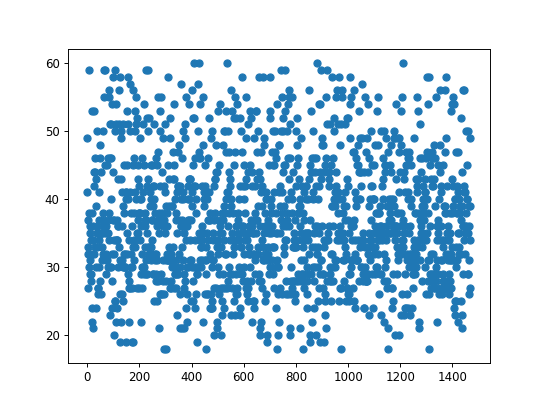

In [15]:
plt.figure()
plt.scatter(np.arange(len(projectlog['Age'])),projectlog['Age'])

<IPython.core.display.Javascript object>


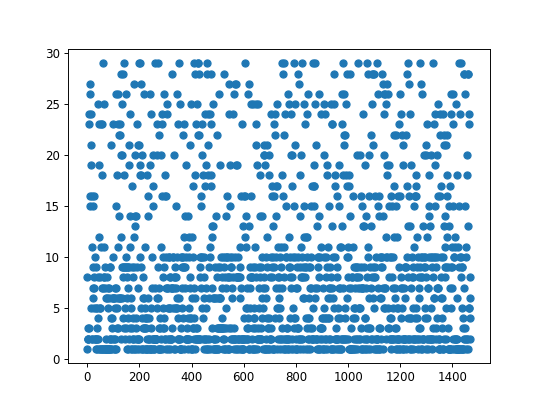

In [17]:
plt.figure()
plt.scatter(np.arange(len(projectlog['DistanceFromHome'])),projectlog['DistanceFromHome'])

<IPython.core.display.Javascript object>


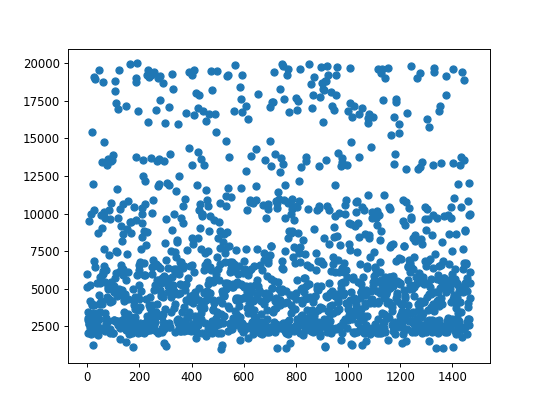

In [18]:
plt.figure()
plt.scatter(np.arange(len(projectlog['MonthlyIncome'])),projectlog['MonthlyIncome'])

<IPython.core.display.Javascript object>


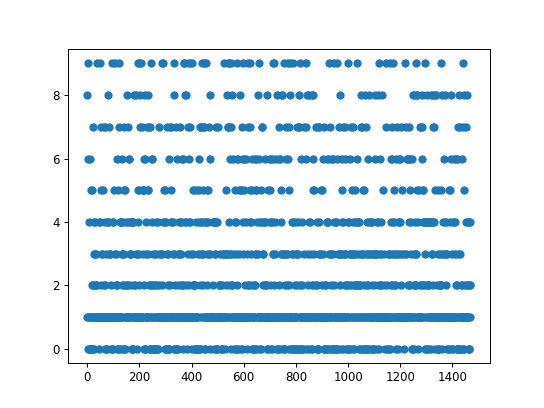

In [19]:
plt.figure()
plt.scatter(np.arange(len(projectlog['NumCompaniesWorked'])),projectlog['NumCompaniesWorked'])

<IPython.core.display.Javascript object>


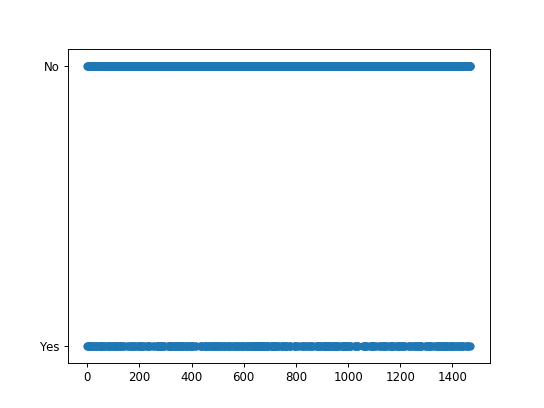

In [21]:
plt.figure()
plt.scatter(np.arange(len(projectlog['OverTime'])),projectlog['OverTime'])

In [22]:
# Splitting X and y into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
# random_state parameter provides seed value to internal random
# number generator function
# default 75% - 25% partitioning of data into Training and Test data set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1102, 59)
(368, 59)
(1102,)
(368,)


In [23]:
# Fitting logistic regression
log_mod = LogisticRegression().fit(X_train, y_train)
print('Accuracy of Logistic regression   classifier on training set: {:.4f}'
        .format(log_mod.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.4f}'
        .format(log_mod.score(X_test, y_test)))

C:\Users\Suchitra Pujari\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression   classifier on training set: 0.8902
Accuracy of Logistic regression classifier on test set: 0.8859


In [27]:
# Confusion matrix
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
#Regression Classifier
y_test_predicted = log_mod.predict(X_test)
confusion = confusion_matrix(y_test, y_test_predicted)

print('Most Frequest Class (Logistic classifier) ', confusion)
print('Logistic Accuracy: {:.4f}'.format(accuracy_score(y_test, y_test_predicted)))
print('Logistic Precision: {:.4f}'.format(precision_score(y_test, y_test_predicted)))
print('Logistic Recall: {:.4f}'.format(recall_score(y_test, y_test_predicted)))
print('Logistic F1: {:.4f}'.format(f1_score(y_test, y_test_predicted)))

Most Frequest Class (Logistic classifier)  [[303   7]
 [ 35  23]]
Logistic Accuracy: 0.8859
Logistic Precision: 0.7667
Logistic Recall: 0.3966
Logistic F1: 0.5227


In [28]:
# Dummy CLassifier
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

y_majority_predicted_dummy = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted_dummy)

print('Most Frequest Class (dummy classifier) ', confusion)
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_majority_predicted_dummy)))
print('Precision: {:.4f}'.format(precision_score(y_test, y_majority_predicted_dummy)))
print('Recall: {:.4f}'.format(recall_score(y_test, y_majority_predicted_dummy)))
print('F1: {:.4f}'.format(f1_score(y_test, y_majority_predicted_dummy)))

Most Frequest Class (dummy classifier)  [[310   0]
 [ 58   0]]
Accuracy: 0.8424
Precision: 0.0000
Recall: 0.0000
F1: 0.0000


C:\Users\Suchitra Pujari\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Suchitra Pujari\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
